# Load dữ liệu và các bước tiền xử lý

In [2]:
# Các thư viện cần thiết
import numpy as np                  # Thư viện tính toán ma trận và xử lý số liệu
import tensorflow as tf             # Thư viện TensorFlow để làm việc với dữ liệu và xây dựng mô hình
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành các tập con


# Tải dữ liệu Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Chia tập huấn luyện thành tập con huấn luyện và tập xác thực
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Kiểm tra giá trị pixel trước khi chuẩn hóa
print(X_train.min(), X_train.max())
print(X_valid.min(), X_valid.max())
print(X_test.min(), X_test.max())

# Chuẩn hóa dữ liệu
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Kiểm tra giá trị pixel sau khi chuẩn hóa
print('---------------------------')
print(X_train.min(), X_train.max())
print(X_valid.min(), X_valid.max())
print(X_test.min(), X_test.max())

# Reshape dữ liệu từ (28, 28) thành (784,) để phù hợp với PCA
X_train = X_train.reshape(X_train.shape[0], -1)  # Chuyển đổi thành ma trận 2D
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)

# Đổi tên thành X_pca và y_pca để trực quan hóa
X_pca = X_train
y_pca = y_train
X_test_pca = X_test.reshape(X_test.shape[0], -1)

print(X_pca.shape)
print(y_pca.shape)
print(X_test_pca.shape)

0 255
0 255
0 255
---------------------------
0.0 1.0
0.0 1.0
0.0 1.0
(48000, 784)
(48000, 784)
(48000,)
(10000, 784)


# Trực quan hóa 2D và 3D

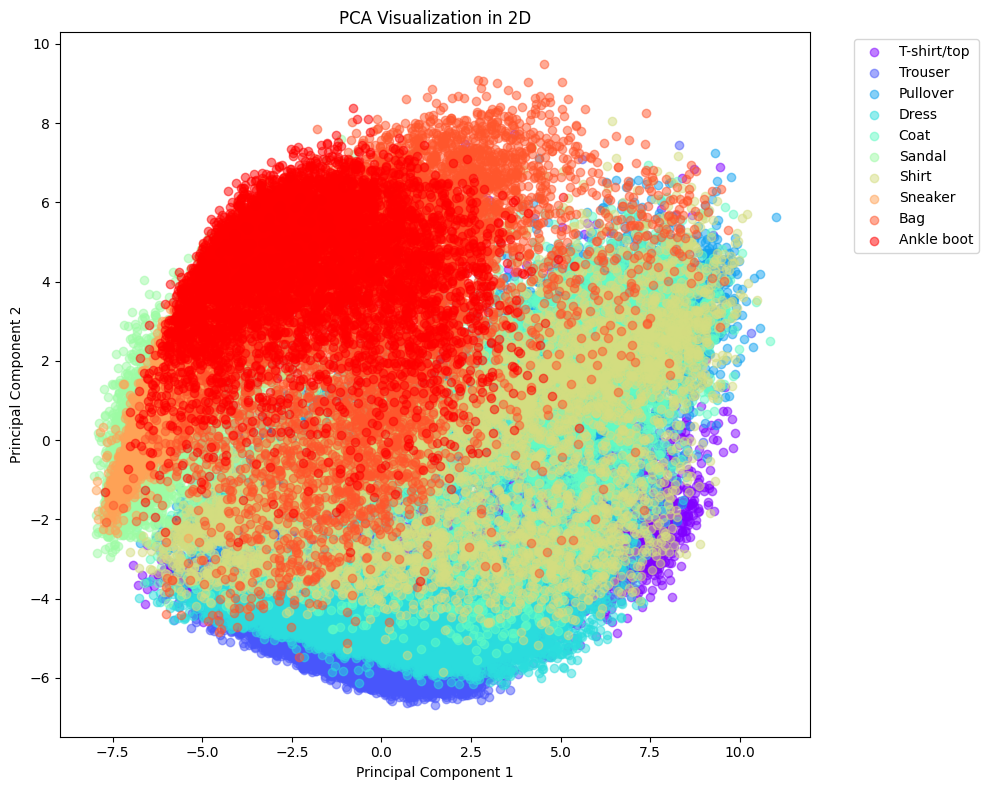

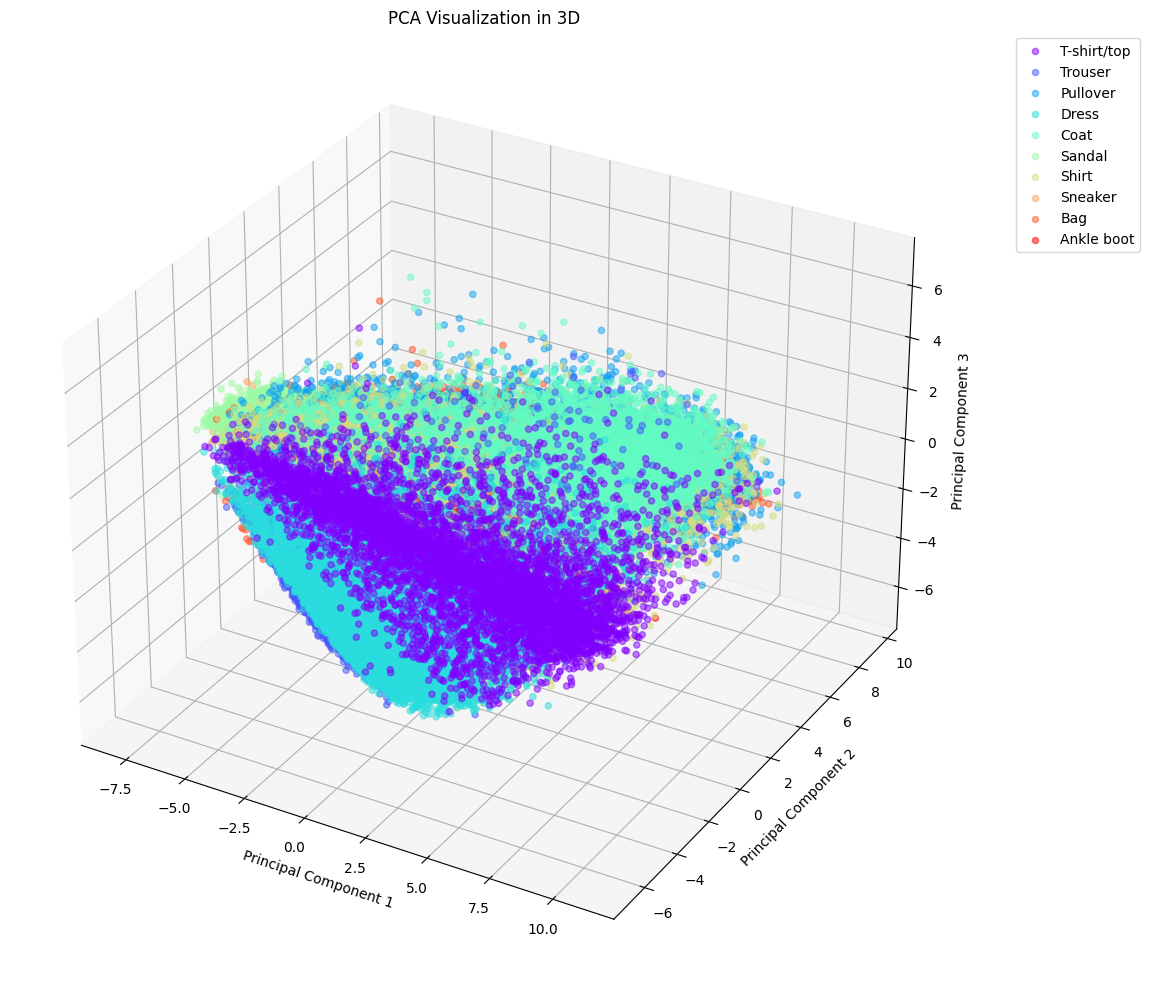

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Thực hiện PCA để giảm chiều xuống 2 và 3
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_pca)

# Đặt bảng màu
colors = plt.cm.rainbow(np.linspace(0, 1, len(class_names)))

# Trực quan hóa 2D
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    mask = (y_pca == i)
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], color=color, label=class_names[i], alpha=0.5)
plt.title("PCA Visualization in 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Trực quan hóa 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colors):
    mask = (y_pca == i)
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               color=color, label=class_names[i], alpha=0.5)
ax.set_title("PCA Visualization in 3D")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(loc="best", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# In 5 ảnh ngẫu nhiên không PCA và có PCA

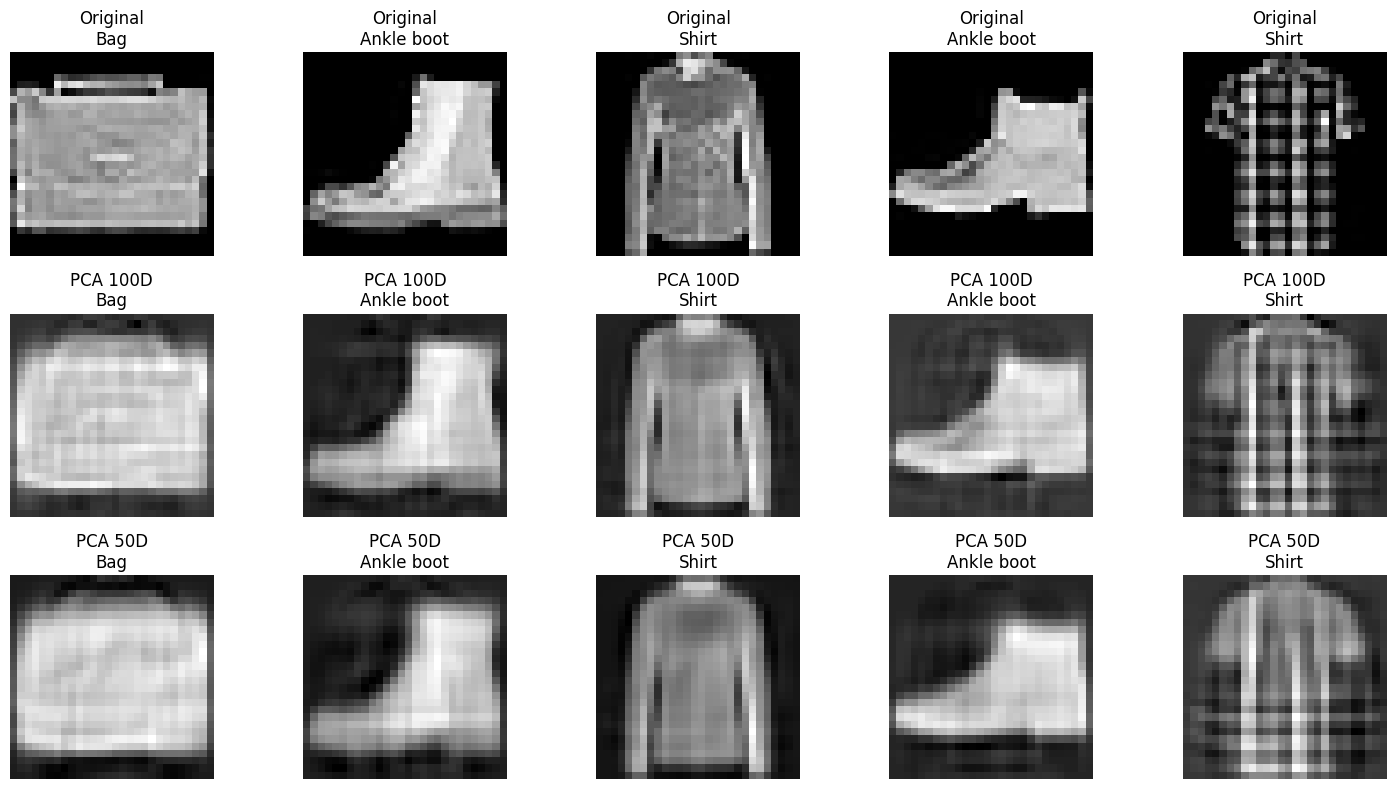

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Giả sử X_pca và y là dữ liệu đầu vào
# y chứa các nhãn tương ứng của mỗi hình ảnh
# class_names chứa tên của từng lớp

# Giảm chiều dữ liệu xuống còn 100 và 50 bằng PCA
pca_100 = PCA(n_components=100)
X_pca_100 = pca_100.fit_transform(X_pca)

pca_50 = PCA(n_components=50)
X_pca_50 = pca_50.fit_transform(X_pca)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Lấy 5 hình ảnh ngẫu nhiên từ tập dữ liệu
indices = np.random.choice(len(X_pca), 5, replace=False)
images_original = X_pca[indices].reshape(-1, 28, 28)  # Chuyển về kích thước ban đầu
images_pca_100 = pca_100.inverse_transform(X_pca_100[indices]).reshape(-1, 28, 28)  # Khôi phục sau khi PCA 100
images_pca_50 = pca_50.inverse_transform(X_pca_50[indices]).reshape(-1, 28, 28)  # Khôi phục sau khi PCA 50
labels = y_pca[indices]  # Lấy nhãn của các hình ảnh

# Hiển thị hình ảnh trước và sau khi giảm chiều
fig, axes = plt.subplots(3, 5, figsize=(15, 8))

# Vòng lặp để hiển thị hình ảnh
for i in range(5):
    # Hình ảnh gốc
    axes[0, i].imshow(images_original[i], cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Original\n{class_names[labels[i]]}")

    # Hình ảnh sau khi giảm chiều PCA 100D
    axes[1, i].imshow(images_pca_100[i], cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"PCA 100D\n{class_names[labels[i]]}")

    # Hình ảnh sau khi giảm chiều PCA 50D
    axes[2, i].imshow(images_pca_50[i], cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title(f"PCA 50D\n{class_names[labels[i]]}")

plt.tight_layout()
plt.show()


# Biểu đồ phương sai tích lũy.

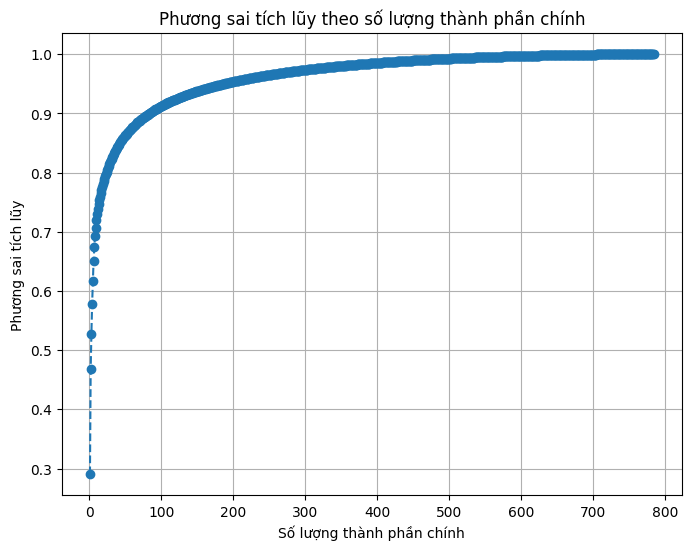

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Áp dụng PCA cho dữ liệu
pca1 = PCA()
X_pca_reduced = pca1.fit_transform(X_pca)

# Tính toán phương sai tích lũy
explained_variance = np.cumsum(pca1.explained_variance_ratio_)

# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Phương sai tích lũy theo số lượng thành phần chính')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.grid(True)
plt.show()


# Biểu đồ phương sai giải thích.

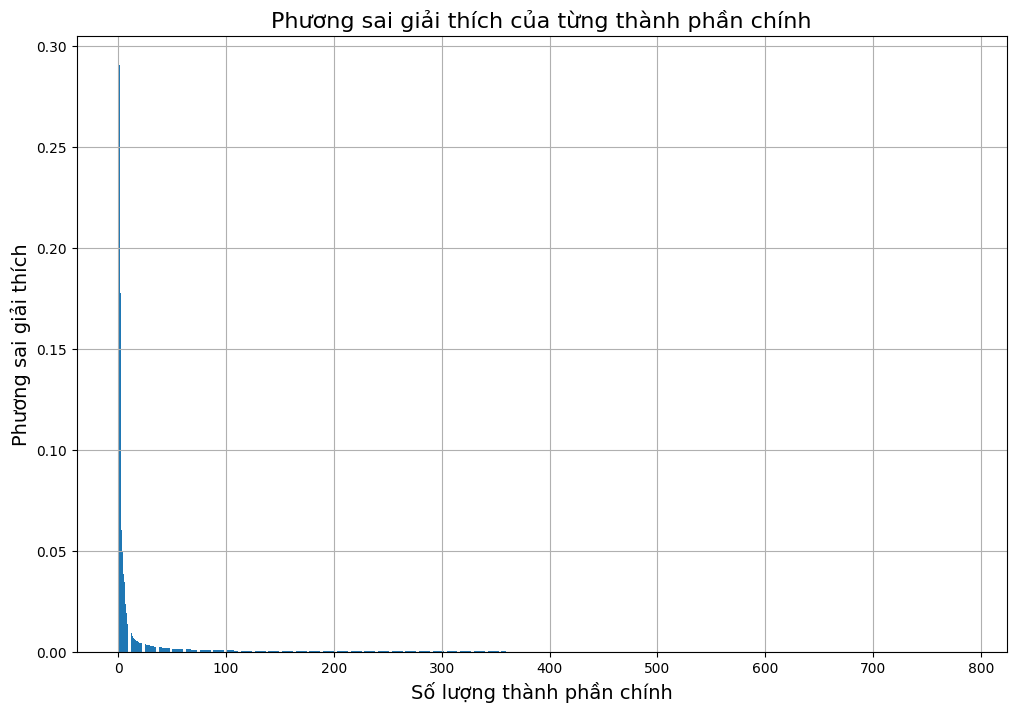

In [ ]:
# Vẽ biểu đồ phương sai giải thích của mỗi thành phần chính với kích thước phóng to
plt.figure(figsize=(12, 8))  # Tăng kích thước biểu đồ
plt.bar(range(1, len(pca1.explained_variance_ratio_) + 1), pca1.explained_variance_ratio_)
plt.title('Phương sai giải thích của từng thành phần chính', fontsize=16)  # Tăng kích thước font tiêu đề
plt.xlabel('Số lượng thành phần chính', fontsize=14)  # Tăng kích thước font cho trục x
plt.ylabel('Phương sai giải thích', fontsize=14)  # Tăng kích thước font cho trục y
plt.grid(True)
plt.show()


# 6 cặp thành phần chính đầu tiên.

In [ ]:

# Phân tích thống kê
print("Mean of X_train:", np.mean(X_train))
print("Standard Deviation of X_train:", np.std(X_train))
print("Median of X_train:", np.median(X_train))


# Chuẩn hóa dữ liệu (đã được thực hiện ở trên)

# Đánh giá thành phần chính
pca_50 = PCA(n_components=50) # Ví dụ với 50 thành phần chính
X_reduced_50 = pca_50.fit_transform(X_pca)

explained_variance = pca_50.explained_variance_ratio_
print("Explained variance ratio of top 5 components", explained_variance[:5])

# Hiển thị trực quan
n_components_to_visualize = min(6, X_reduced_50.shape[1]) # Tối đa 6 thành phần
for i in range(n_components_to_visualize - 1):
    for j in range(i + 1, n_components_to_visualize):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_reduced_50[:, i], X_reduced_50[:, j], c=y_pca, cmap='rainbow', alpha=0.5)
        plt.title(f'Principal Component {i + 1} vs {j + 1}')
        plt.xlabel(f'PC {i + 1}')
        plt.ylabel(f'PC {j + 1}')
        plt.colorbar(label='Class Label')
        plt.grid(True)
        plt.show()

# Phương sai tích lũy cho 100 thành phần chính đầu tiên.

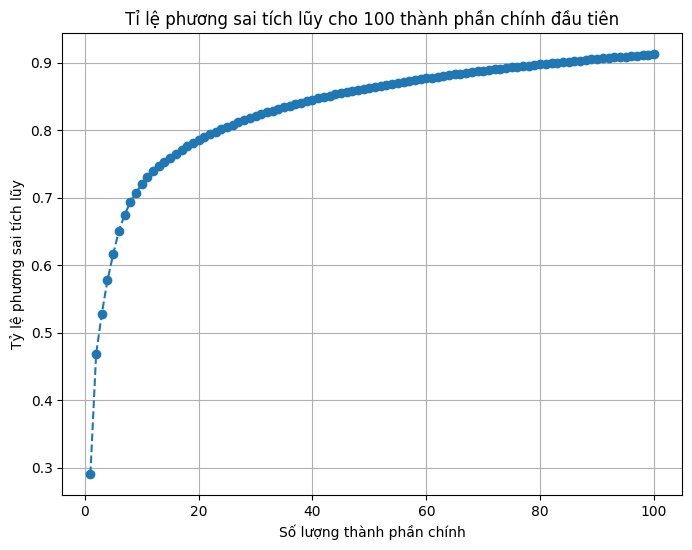

Tỉ lệ phương sai tích lũy cho 100 thành phần chính đầu tiên: 0.912348747253418


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Khởi tạo PCA với số lượng thành phần chính tối đa (số lượng thành phần bằng số chiều dữ liệu)
pca = PCA()

# Tiến hành huấn luyện PCA trên tập dữ liệu huấn luyện và tập xác thực
pca.fit(X_pca)

# Lấy tỉ lệ phương sai tích lũy của 100 thành phần đầu tiên (hoặc ít hơn nếu dữ liệu có ít hơn 100 thành phần)
num_components = min(100, len(pca.explained_variance_ratio_))  # Đảm bảo không vượt quá số thành phần có sẵn
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_[:num_components])

# Vẽ đồ thị tỉ lệ phương sai tích lũy
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_components + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.title(f'Tỉ lệ phương sai tích lũy cho {num_components} thành phần chính đầu tiên')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.grid(True)
plt.show()

# In ra tỉ lệ phương sai tích lũy của 100 thành phần đầu tiên
print(f"Tỉ lệ phương sai tích lũy cho {num_components} thành phần chính đầu tiên: {explained_variance_ratio_cumulative[-1]}")
